In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as crs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.io.img_tiles as cimgt

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
data_dir = ''
data_f =  'data.TXT'

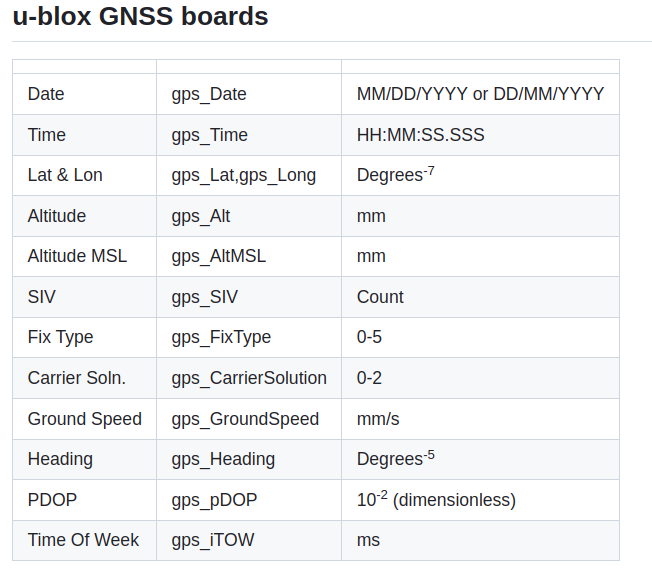

In [3]:
ds = pd.read_csv(data_dir+data_f, index_col=['gps_Date_gps_Time'], parse_dates=[['gps_Date', 'gps_Time']], usecols=[2,3,4,5,6,7,8,9,10,11,12,13])
ds = ds.drop(ds.loc[ds['gps_SIV']<2].index) #remove when not enough satellite in view (SIV)
ds = ds*[1e-7, 1e-7, 1e-3, 1e-3, 1, 1, 1e-3, 1e-5, 1e-2,1]
ds

,gps_Lat,gps_Long,gps_Alt,gps_AltMSL,gps_SIV,gps_FixType,gps_GroundSpeed,gps_Heading,gps_pDOP,gps_iTOW
gps_Date_gps_Time,,,,,,,,,,
2023-08-28 06:36:57,60.398854,5.327708,142.003,98.204,3.0,2.0,0.065,0.00000,2.61,110265000.0
2023-08-28 06:37:27,60.398854,5.327720,141.077,97.278,3.0,2.0,0.811,0.00000,2.60,110295000.0
2023-08-28 06:37:57,60.398790,5.327492,146.632,102.833,3.0,2.0,1.202,311.21074,2.59,110325000.0
2023-08-28 06:38:27,60.398515,5.326842,122.776,78.976,4.0,3.0,0.918,203.63192,6.14,110355000.0
2023-08-28 06:38:57,60.398318,5.326317,60.261,16.461,4.0,3.0,1.841,168.48228,6.12,110385000.0
2023-08-28 06:39:27,60.398190,5.325620,19.658,-24.143,5.0,3.0,1.798,228.49516,5.60,110415000.0
2023-08-28 06:39:57,60.397813,5.325323,3.019,-40.782,5.0,3.0,0.256,314.41102,5.58,110445000.0
2023-08-28 06:40:27,60.397032,5.326336,27.101,-16.699,7.0,3.0,1.355,147.97358,2.97,110475000.0
2023-08-28 06:40:57,60.396830,5.327045,39.654,-4.145,10.0,3.0,1.614,128.66532,3.24,110505000.0


In [4]:
df_string = ds.to_csv( 'gps.csv', header=True, index=True)

In [78]:
def plot(ds):
    request = cimgt.OSM()
    data_crs = crs.PlateCarree()
    fig = plt.figure(figsize=(20,20))
    ax = plt.axes(projection=request.crs)
    ax.set_extent(extent(ds))
    ax.add_image(request, 16)
    
    points = np.array([ds['gps_Long'], ds['gps_Lat']]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(ds['gps_GroundSpeed'].min(), ds['gps_GroundSpeed'].max())
    lc = LineCollection(segments, cmap='viridis', norm=norm, transform=data_crs)
    lc.set_array(ds['gps_GroundSpeed'])
    lc.set_linewidth(3)
    line = ax.add_collection(lc)
    fig.colorbar(line, ax=ax, label='Speed (m/s)')
    
    ax.plot(ds['gps_Long'],ds['gps_Lat'], '+r', transform=data_crs)
    gl = ax.gridlines(draw_labels=True, crs=data_crs,
                        color='k',lw=0.1)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
    gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
    
    ax.set_title('GPS Track with speed')
    plt.show()

In [64]:
def extent(ds):
    x_margin = 0.01
    y_margin = 0.001
    
    min_x = min(ds['gps_Long']) - x_margin
    max_x = max(ds['gps_Long']) + x_margin
    min_y = min(ds['gps_Lat']) - y_margin
    max_y = max(ds['gps_Lat']) + y_margin
    
    len_x = (max_x - min_x)*111139*np.cos(min_y*np.pi/180)
    len_y = (max_y - min_y)*111139
    diff = len_x-len_y

    
    if len_x>len_y : 

        min_y = min_y - abs(diff)/(2*111139)
        max_y = max_y + abs(diff)/(2*111139)
        
    elif len_x<len_y :
        min_x = min_x - abs(diff)/(2*111139*np.cos(min_y*np.pi/180))
        max_x = max_x + abs(diff)/(2*111139*np.cos(min_y*np.pi/180))
        
    return [min_x,max_x,min_y,max_y]

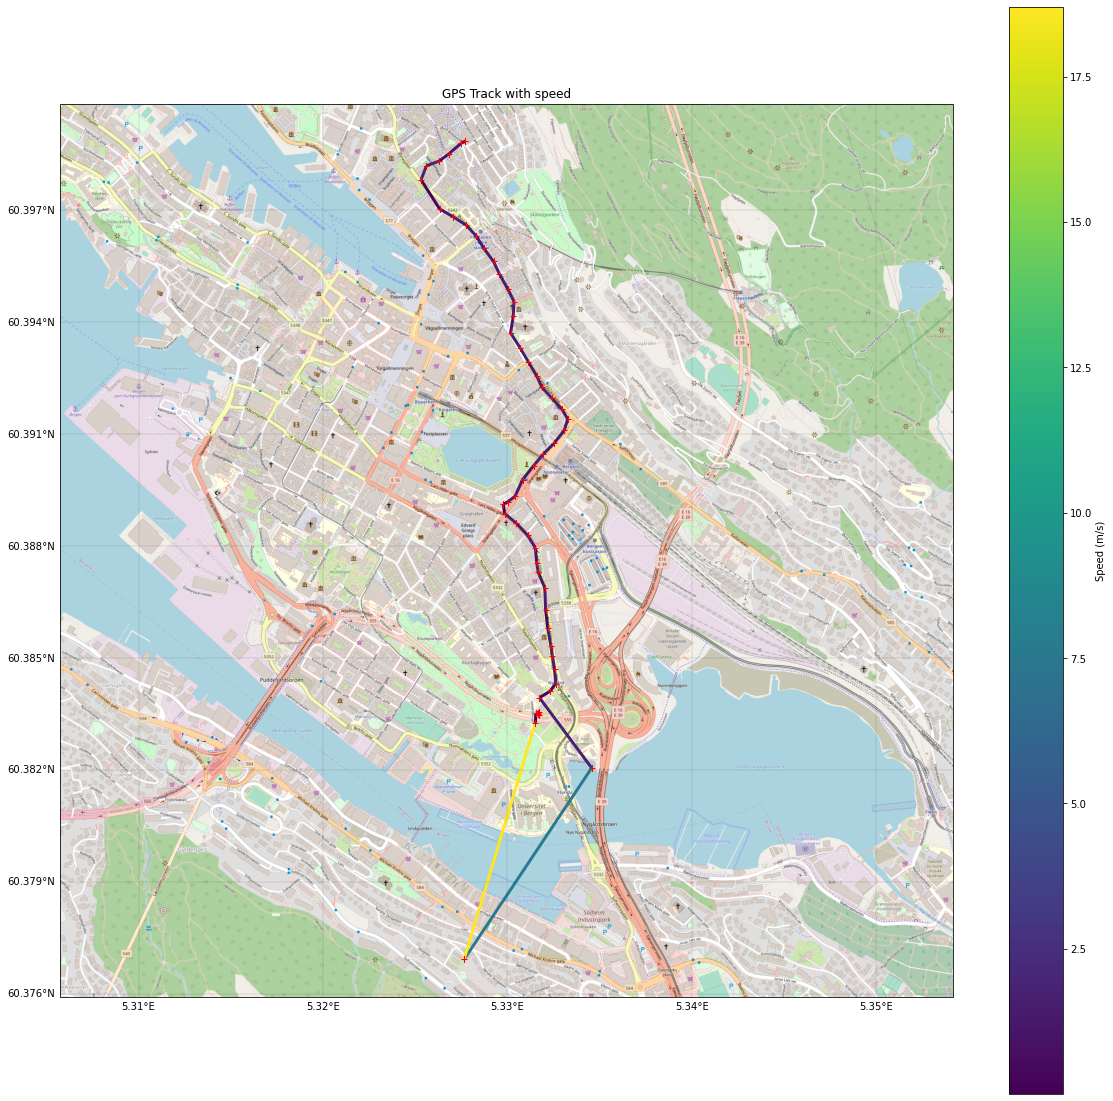

In [79]:
plot(ds)